In [1]:
import copy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

In [2]:
def forcing(xPoint, yPoint):
    return 6. * xPoint * yPoint * (1. - yPoint) - 2. * (xPoint ** 3)


def Poisson(method, nPoints, maxIter, beta = 1.5):
    xPoints = np.linspace(0., 1., nPoints)
    yPoints = np.linspace(0., 1., nPoints)
    
    dx = xPoints[1] - xPoints[0]
    
    grids = np.zeros((nPoints, nPoints), dtype = float)
    
    grids[:,  0] = 0.
    grids[:, -1] = [yPoint * (1. - yPoint) for yPoint in yPoints]
    grids[ 0, :] = 0.
    grids[-1, :] = 0.
    
    for n in tqdm(range(maxIter), total = maxIter, desc = method.upper()):
        if n == 0:
            gridsOld = cp.deepcopy(grids)
            gridsNew = cp.deepcopy(grids)
            
        for i, xPoint in enumerate(xPoints[1 : -1]):
            i += 1
            for j, yPoint in enumerate(yPoints[1 : -1]):
                j += 1
                
                if method == "jacobi":
                    gridsNew[j, i] = (gridsOld[j, i + 1] + gridsOld[j, i - 1] + gridsOld[j + 1, i] + gridsOld[j - 1, i] - (dx ** 2) * forcing(xPoint, yPoint)) / 4.
                
                elif method == "gauss":
                    gridsNew[j, i] = (gridsOld[j, i + 1] + gridsNew[j, i - 1] + gridsOld[j + 1, i] + gridsNew[j - 1, i] - (dx ** 2) * forcing(xPoint, yPoint)) / 4.
                    
                elif method == "sor":
                    gridsNew[j, i] = (beta * (gridsOld[j, i + 1] + gridsNew[j, i - 1] + gridsOld[j + 1, i] + gridsNew[j - 1, i] - (dx ** 2) * forcing(xPoint, yPoint)) / 4.) + ((1. - beta) * gridsOld[j, i])
                
        gridsOld = cp.deepcopy(gridsNew)
    
    xx, yy = np.meshgrid(np.append(xPoints, 1. + dx), np.append(yPoints, 1. + dx))
    
    return xx, yy, gridsNew


def Analytic(nPoints):
    xPoints = np.linspace(0., 1., nPoints)
    yPoints = np.linspace(0., 1., nPoints)
    
    dx = xPoints[1] - xPoints[0]
    
    grids = np.zeros((nPoints, nPoints), dtype = float)
    
    for i, xPoint in enumerate(xPoints):
        for j, yPoint in enumerate(yPoints):
            grids[j, i] = yPoint * (1. - yPoint) * (xPoint ** 3)
    
    xx, yy = np.meshgrid(np.append(xPoints, 1. + dx), np.append(yPoints, 1. + dx))
    
    return xx, yy, grids

JACOBI: 100%|██████████| 1000/1000 [00:30<00:00, 32.74it/s]


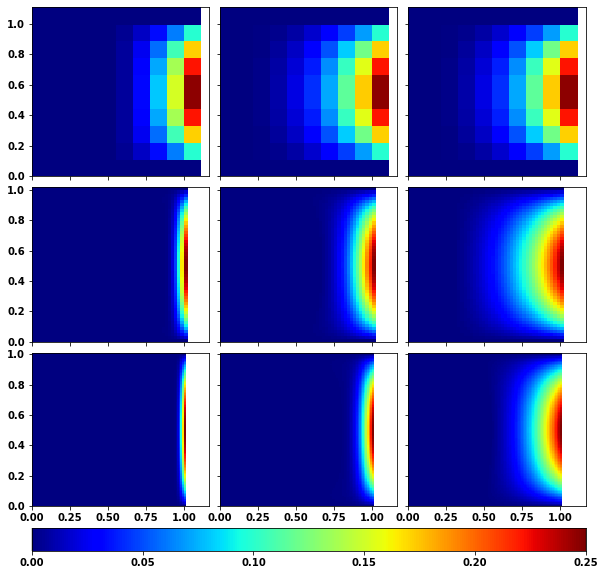

In [3]:
nPoints  = [10, 50, 100]
maxIters = [10, 100, 1000]

fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("jacobi", nPoints[n], maxIters[i])
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_jacobi.png", dpi = 500, bbox_inches = "tight")

GAUSS: 100%|██████████| 1000/1000 [00:29<00:00, 33.63it/s]


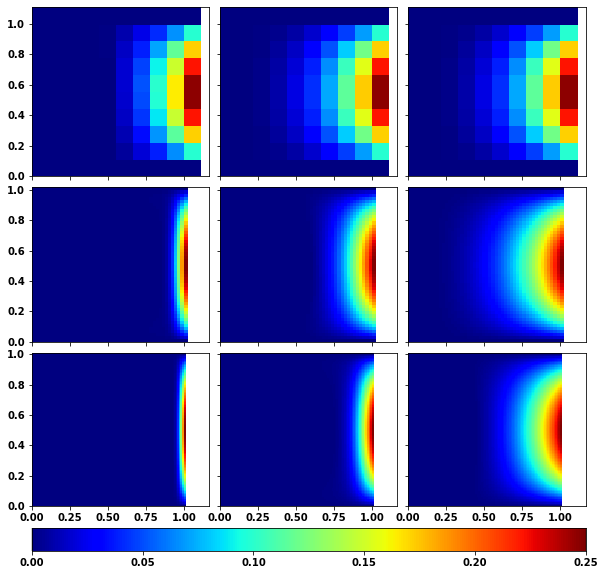

In [5]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("gauss", nPoints[n], maxIters[i])
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_gauss.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:35<00:00, 28.41it/s]


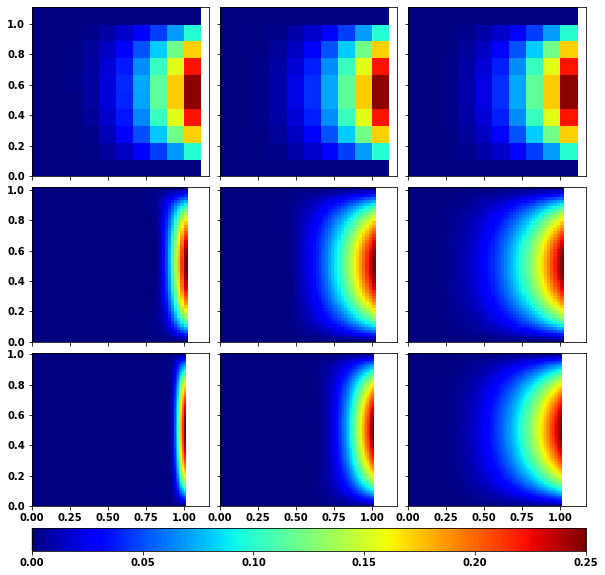

In [6]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.5)
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_sor_1.5.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:35<00:00, 28.05it/s]


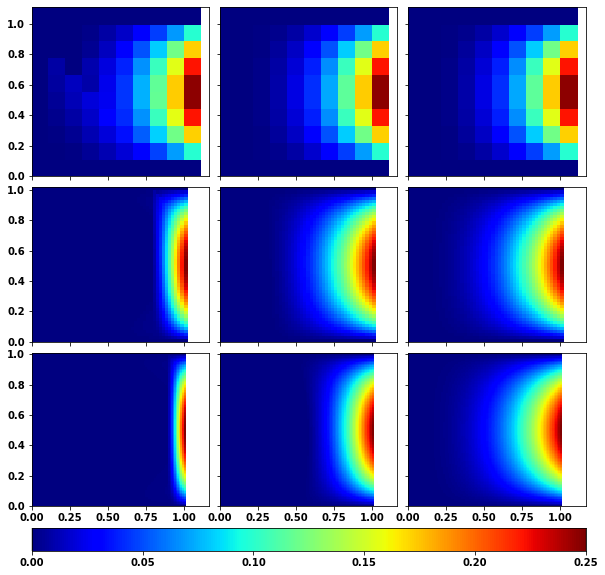

In [7]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.7)
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_sor_1.7.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:35<00:00, 28.30it/s]


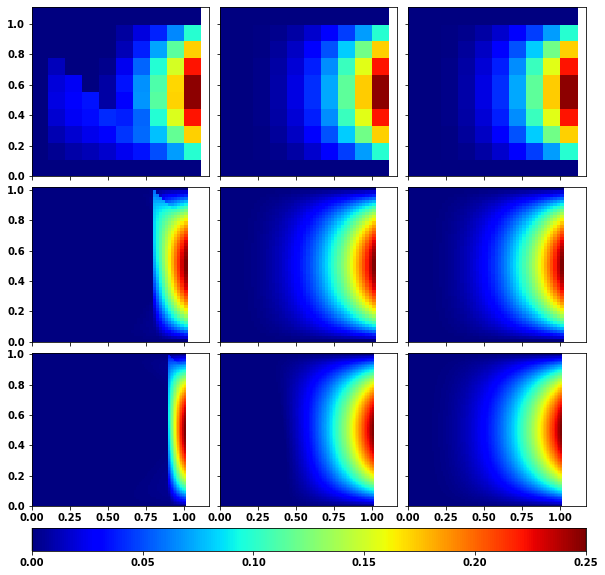

In [8]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.9)
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_sor_1.9.png", dpi = 500, bbox_inches = "tight")

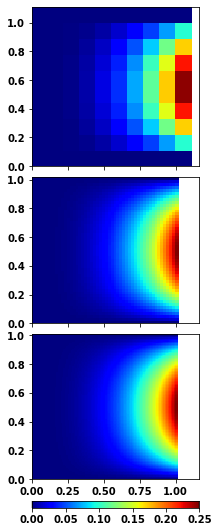

In [9]:
fig  = plt.figure(figsize = (3, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 1), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    xx, yy, grid = Analytic(nPoints[s])
    
    plot = sub.pcolor(xx, yy, grid, cmap = "jet", vmin = 0., vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_analytic.png", dpi = 500, bbox_inches = "tight")

JACOBI: 100%|██████████| 1000/1000 [00:30<00:00, 32.98it/s]


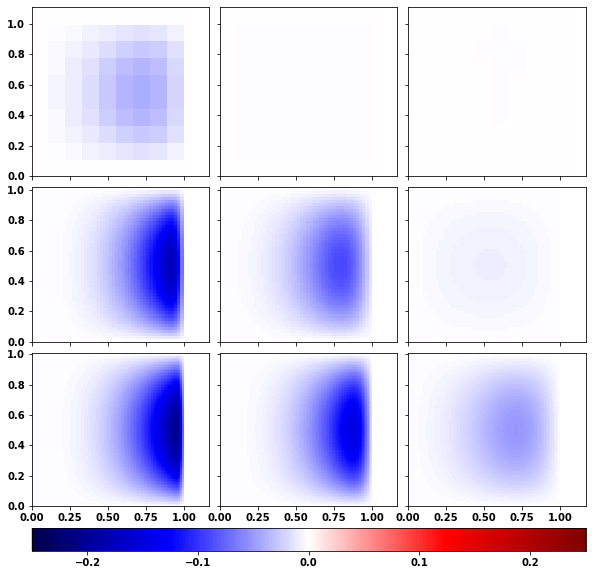

In [13]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("jacobi", nPoints[n], maxIters[i])
    _ , _ , ref  = Analytic(nPoints[n])
    
    plot = sub.pcolor(xx, yy, grid - ref, cmap = "seismic", vmin = -0.25, vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_diff_jacobi.png", dpi = 500, bbox_inches = "tight")

GAUSS: 100%|██████████| 1000/1000 [00:30<00:00, 33.03it/s]


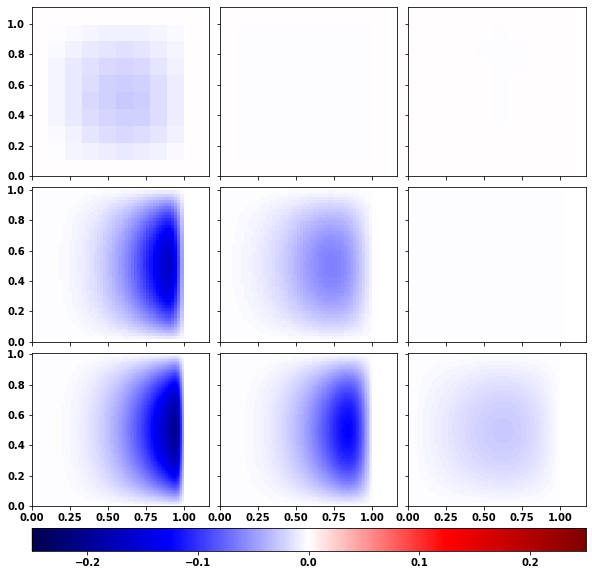

In [14]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("gauss", nPoints[n], maxIters[i])
    _ , _ , ref  = Analytic(nPoints[n])
    
    plot = sub.pcolor(xx, yy, grid - ref, cmap = "seismic", vmin = -0.25, vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_diff_gauss.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:36<00:00, 27.67it/s]


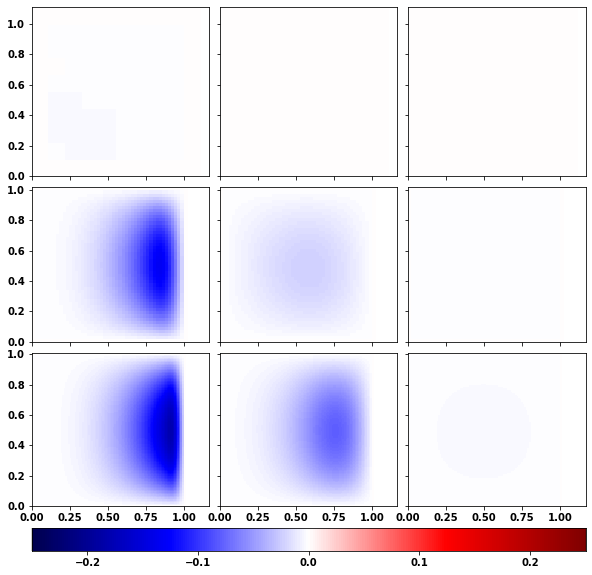

In [15]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.5)
    _ , _ , ref  = Analytic(nPoints[n])
    
    plot = sub.pcolor(xx, yy, grid - ref, cmap = "seismic", vmin = -0.25, vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_diff_sor_1.5.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:36<00:00, 27.46it/s]


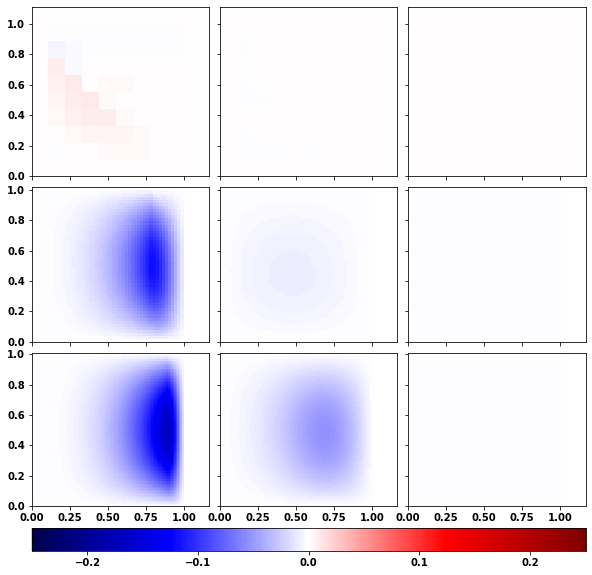

In [16]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.7)
    _ , _ , ref  = Analytic(nPoints[n])
    
    plot = sub.pcolor(xx, yy, grid - ref, cmap = "seismic", vmin = -0.25, vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_diff_sor_1.7.png", dpi = 500, bbox_inches = "tight")

SOR: 100%|██████████| 1000/1000 [00:36<00:00, 27.40it/s]


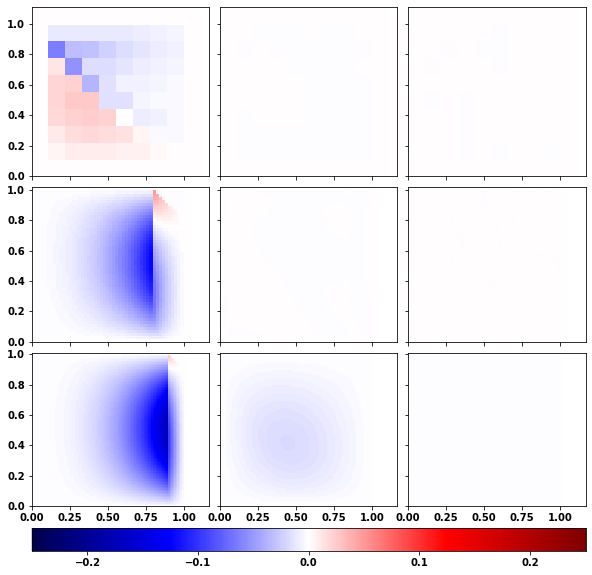

In [17]:
fig  = plt.figure(figsize = (10, 10))
subs = ImageGrid(fig, 111, nrows_ncols = (3, 3), axes_pad = 0.15, cbar_mode = "single", cbar_location = "bottom", cbar_pad = 0.15)

for s, sub in enumerate(subs):
    n = s // len(maxIters)
    i = s %  len(maxIters)
    
    xx, yy, grid = Poisson("sor", nPoints[n], maxIters[i], beta = 1.9)
    _ , _ , ref  = Analytic(nPoints[n])
    
    plot = sub.pcolor(xx, yy, grid - ref, cmap = "seismic", vmin = -0.25, vmax = 0.25)

cb = subs.cbar_axes[0].colorbar(plot)

plt.savefig("./HW5/5_1_diff_sor_1.9.png", dpi = 500, bbox_inches = "tight")